In [2]:
### Beta Cephei Radial Velocity Curve Fit

In [3]:
import os
from astropy import *
import numpy as np
import math as math
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.optimize import curve_fit
pi=3.14159265358979323846264
def orbit(x,p1,p2,p3,p4): return p1*np.sin((x-p2)/p3)+p4

In [4]:
data = np.loadtxt("hjd.txt"[:])
time = data[:,0]
hjd = time-2458054
helium = data[:,1]
oxygen = data[:,3]
watervap = data[:,5]

helox = helium - oxygen
helwa = helium - watervap

residual = 0.539 km/s
Period = 0.190828 days
Amplitude = 18.04 km/s
Phase = 0.1353 days
Zero Point = -3.12 km/s


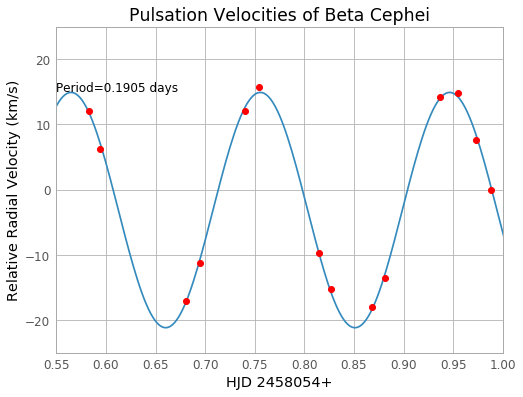

In [5]:
#ydata=np.array([2.005,-0.055,-20.451,-9.615,4.512,12.540,14.207,7.099,
#-3.088,-19.608,-12.835,-0.942,13.803,15.036,-2.801])
#xdata=np.array([.6687,.672,.7224,.76145,.7872,.80369,.8333,.84857,.87841,
#.91511,.94696,.96929,.99675,1.02271,1.0581])
popt, pcov = curve_fit(orbit, hjd, helium, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = helium - orbit(hjd,p1,p2,p3,p4)
n=14
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.55, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
plt.plot(xx,c)
plt.plot(hjd,helium,'ro')
plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
plt.text(0.55, 15, r'Period=0.1905 days')
plt.axis([0.55, 1.0, -25, 25])
plt.grid(True)
plt.show()

residual = 0.480 km/s
Period = 0.190857 days
Amplitude = 18.02 km/s
Phase = 0.1352 days
Zero Point = -3.11 km/s


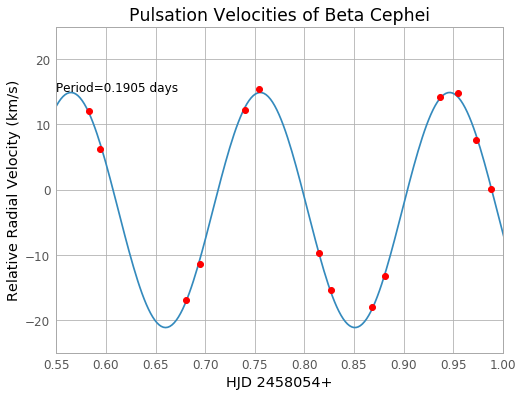

In [6]:
popt, pcov = curve_fit(orbit, hjd, helox, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = helox - orbit(hjd,p1,p2,p3,p4)
n=14
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.55, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
plt.plot(xx,c)
plt.plot(hjd,helox,'ro')
plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("residual =", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
plt.text(0.55, 15, r'Period=0.1905 days')
plt.axis([0.55, 1.0, -25, 25])
plt.grid(True)
plt.show()

residual 0.575 km/s
Period = 0.190794 days
Amplitude = 18.02 km/s
Phase = 0.1354 days
Zero Point = -3.11 km/s


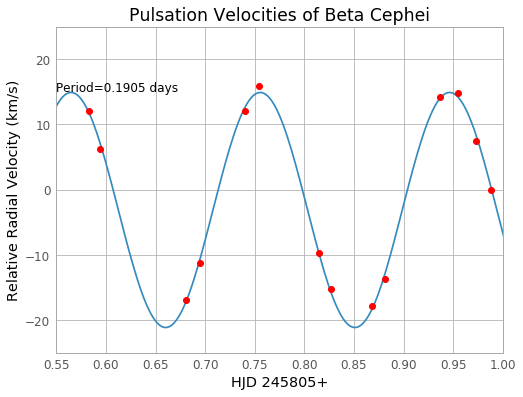

In [8]:
popt, pcov = curve_fit(orbit, hjd, helwa, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = helwa - orbit(hjd,p1,p2,p3,p4)
n=14
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.55, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
plt.plot(xx,c)
plt.plot(hjd,helwa,'ro')
plt.xlabel('HJD 245805+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
plt.text(0.55, 15, r'Period=0.1905 days')
plt.axis([0.55, 1.0, -25, 25])
plt.grid(True)
plt.show()

In [9]:
waterox_avg = ((watervap/(0.575**2))+(oxygen/(0.480**2)))/((1/0.575**2)+(1/0.480**2))
waterox_avg

array([ 0.03889323, -0.030694  , -0.11837369, -0.00476378, -0.0046284 ,
        0.13149512,  0.06853594,  0.08598779, -0.05085206, -0.07835346,
        0.00873098, -0.04487474,  0.00176169, -0.00520133])

In [10]:
helium_avg = helium - waterox_avg
helium_avg

array([ 12.01710677,   6.244694  , -16.91062631, -11.29023622,
        12.1306284 ,  15.63050488,  -9.70953594, -15.24498779,
       -17.93014794, -13.43664654,  14.16426902,  14.83487474,
         7.55523831,   0.03520133])

residual 0.515 km/s
Period = 0.190831 days
Amplitude = 18.02 km/s
Phase = 0.1353 days
Zero Point = -3.11 km/s


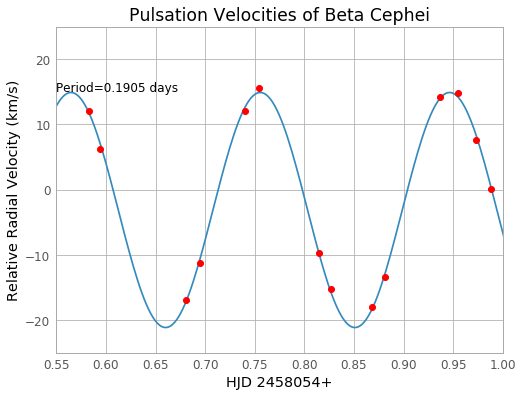

In [11]:
popt, pcov = curve_fit(orbit, hjd, helium_avg, p0=(18.0,0.2,0.03,-2.5))
p1 = popt[0]
p2 = popt[1]
p3 = popt[2]
p4 = popt[3]
residuals = helium_avg - orbit(hjd,p1,p2,p3,p4)
n=14
fres = math.sqrt(sum(residuals**2)/n)
xx=np.linspace(0.55, 1.1, 256, endpoint=True)
c=p1*np.sin((xx-p2)/p3)+p4
plt.plot(xx,c)
plt.plot(hjd,helium_avg,'ro')
plt.xlabel('HJD 2458054+')
plt.ylabel('Relative Radial Velocity (km/s)')
plt.title('Pulsation Velocities of Beta Cephei')
per=np.multiply(2*pi,p3)
print("residual", '%.3f' % fres, "km/s")
print("Period =", '%.6f' %  per, "days")
print("Amplitude =", '%.2f' % p1, "km/s")
print("Phase =", '%.4f' % p2, "days")
print("Zero Point =", '%.2f' % p4, "km/s")
plt.text(0.55, 15, r'Period=0.1905 days')
plt.axis([0.55, 1.0, -25, 25])
plt.grid(True)
plt.show()

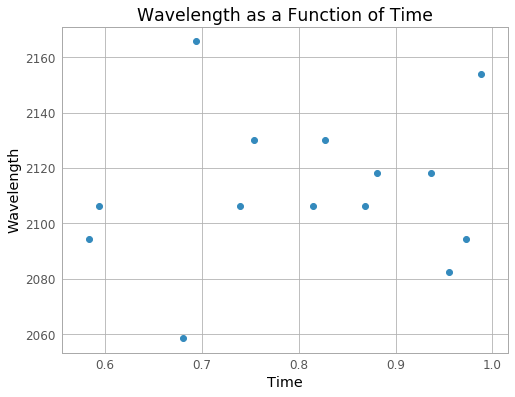

In [21]:
file = np.loadtxt("width.txt"[:])

means = file[:,1]
npix = file[:,0]
equiwidth = npix*(1-means)*3*148

plt.scatter(hjd,equiwidth)
plt.title('Wavelength as a Function of Time')
plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.show()

Because the radial velocity curve had a sinusodial shape, it can be deduced that the star's brightness was shifting (increasing and/or decreasing) with every pulsation, as it comes closer to Earth then furhter away along its rotational period.

The period of Beta Cephei was found to be ~0.19 days with an amplitude of ~18 km/s.

As can be observed, after correcting for the Oxygen lines, the error reduced greatly. However, when the same procedure was done for the water vapor, the error actually increased, which means correcting for the water vapor did not give a "good" result.

Optional: the wavelength as a function of time was calculated and plotted.